In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# fonte dos dados (source): https://prefeitura.pbh.gov.br/saude/coronavirus
# > BOLETIM EPIDEMIOLÓGICO E ASSISTENCIAL
df = pd.read_csv('covid-bh.csv')
df

,DATA,CONFIRMADOS,EM ACOMPANHAMENTO,RECUPERADOS,ÓBITOS
0,2020-05-15,1088,NaN,NaN,29
1,2020-05-18,1189,156.0,1002.0,31
2,2020-05-19,1249,155.0,1061.0,33
3,2020-05-20,1249,NaN,NaN,35
4,2020-05-21,1316,187.0,1090.0,36
...,...,...,...,...,...
156,2020-12-30,62890,3110.0,57922.0,1858
157,2020-12-31,63387,3282.0,58228.0,1877
158,2021-1-4,64530,3272.0,59363.0,1895
159,2021-1-5,65141,3406.0,59834.0,1901


In [3]:
df.dtypes

DATA                  object
CONFIRMADOS            int64
EM ACOMPANHAMENTO    float64
RECUPERADOS          float64
ÓBITOS                 int64
dtype: object

In [4]:
df['ÓBITOS']

0        29
1        31
2        33
3        35
4        36
       ... 
156    1858
157    1877
158    1895
159    1901
160    1915
Name: ÓBITOS, Length: 161, dtype: int64

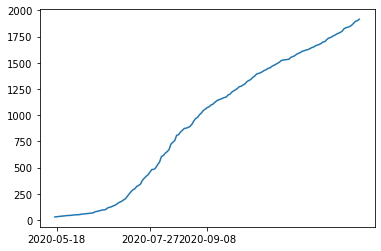

In [5]:
plt.xticks([1,50,80])
plt.plot(df['DATA'], df['ÓBITOS'])

In [6]:
df = df.dropna().reset_index(drop=True)

In [7]:
df

,DATA,CONFIRMADOS,EM ACOMPANHAMENTO,RECUPERADOS,ÓBITOS
0,2020-05-18,1189,156.0,1002.0,31
1,2020-05-19,1249,155.0,1061.0,33
2,2020-05-21,1316,187.0,1090.0,36
3,2020-05-25,1444,275.0,1127.0,42
4,2020-05-26,1534,280.0,1211.0,43
...,...,...,...,...,...
149,2020-12-30,62890,3110.0,57922.0,1858
150,2020-12-31,63387,3282.0,58228.0,1877
151,2021-1-4,64530,3272.0,59363.0,1895
152,2021-1-5,65141,3406.0,59834.0,1901


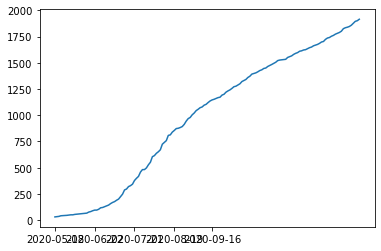

In [8]:
plt.xticks([0,20,40,60,79])
plt.plot(df['DATA'], df['ÓBITOS'])

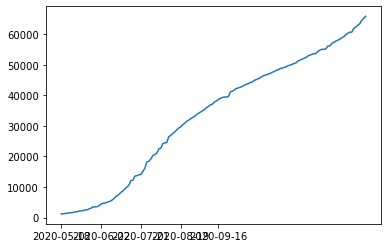

In [9]:
# if confirmed means confirmed infected now (accumulated infected - removed)
plt.xticks([0,20,40,60,79])
plt.plot(df['DATA'], df['CONFIRMADOS'])

In [10]:
df['RECUPERADOSNOVOS'] = df['RECUPERADOS'].diff()
df['RECUPERADOSNOVOS'][0] = 0

<ipython-input-10-d5e2d50be54a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RECUPERADOSNOVOS'][0] = 0


In [11]:
df['RECUPERADOSNOVOS'][0]

0.0

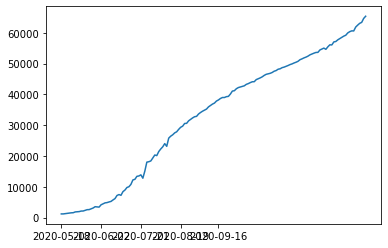

In [12]:
# if recovered means removed (recovered + dead) 
sick = df['CONFIRMADOS'] - df['RECUPERADOSNOVOS']
plt.xticks([0,20,40,60,79])
plt.plot(df['DATA'], sick)

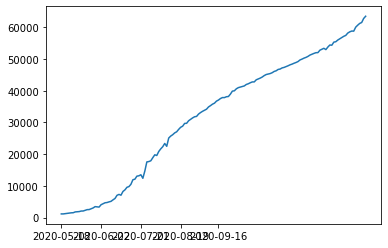

In [13]:
# if recovered really means recovered
sick = df['CONFIRMADOS'] - df['RECUPERADOSNOVOS'] - df['ÓBITOS']
plt.xticks([0,20,40,60,79])
plt.plot(df['DATA'], sick)